In [1]:
%matplotlib inline
#https://seaborn.pydata.org/examples/scatterplot_matrix.html
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import codecs
import seaborn as sns

In [2]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [3]:
#ファイルを読み込み
video_tsv_merge_data = pd.read_table('./Output/pivot_merge/video_tsv_merge_data.tsv',sep="\t", index_col=None)
video_tsv_merge_data

,video_id,watch_num,comment_num,mylist_num,title,category,upload_time,file_type,length,size_high,size_low
0,sm8896,38882,1292,435,(MAD) [東方] うどんげとてゐ,NaN,1173211747,flv,241,5215313,3737091
1,sm5800,429015,2464,2757,ロベルト・カルロスのフリーキック,スポーツ,1173174475,flv,65,3289769,3242845
2,sm8917,3953,63,13,THE IDOLM@STER アイドルマスター 魔法をかけて by 亜美＠とかち,NaN,1173212678,flv,129,5342052,5294972
3,sm4786,7636,164,19,beatmania RE-ROOTS(A),NaN,1173164796,flv,117,5666433,5580696
4,sm5017,1274,13,0,ビットジェネーレーション デジドライブ,NaN,1173166855,flv,358,12203974,9092032
5,sm1552,10007,349,27,IDOLM@STER アイドルマスター 美希 ショート コミュ ABランク TVリハーサル,NaN,1173138306,flv,172,7882160,7642193
6,sm2467,9521,418,50,[peercast] 佐々木と愉快な仲間たち もう恋なんてしない,NaN,1173146610,flv,271,7469965,7371343
7,sm7747,31762,92,12,斬鉄・・・,NaN,1173193550,flv,14,744634,746153
8,sm7864,362704,7167,5678,大神ＭＡＤ,NaN,1173194895,flv,211,9970129,9593707
9,sm4375,141676,1678,2463,【ＭＡＤ】 アーマードコア ACPV forever 『原罪のレクイエム』,ゲーム,1173160974,flv,240,11419358,11221804


In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [5]:
#項目選択
video_tsv_merge_data_value1 = video_tsv_merge_data.iloc[:,1:4]
video_tsv_merge_data_value2 = video_tsv_merge_data.iloc[:,8:9]

#pairplot用のデータフレームを作成
video_tsv_merge_concat = pd.concat([video_tsv_merge_data_value1,video_tsv_merge_data_value2],axis=1)

In [6]:
video_tsv_merge_concat

,watch_num,comment_num,mylist_num,length
0,38882,1292,435,241
1,429015,2464,2757,65
2,3953,63,13,129
3,7636,164,19,117
4,1274,13,0,358
5,10007,349,27,172
6,9521,418,50,271
7,31762,92,12,14
8,362704,7167,5678,211
9,141676,1678,2463,240


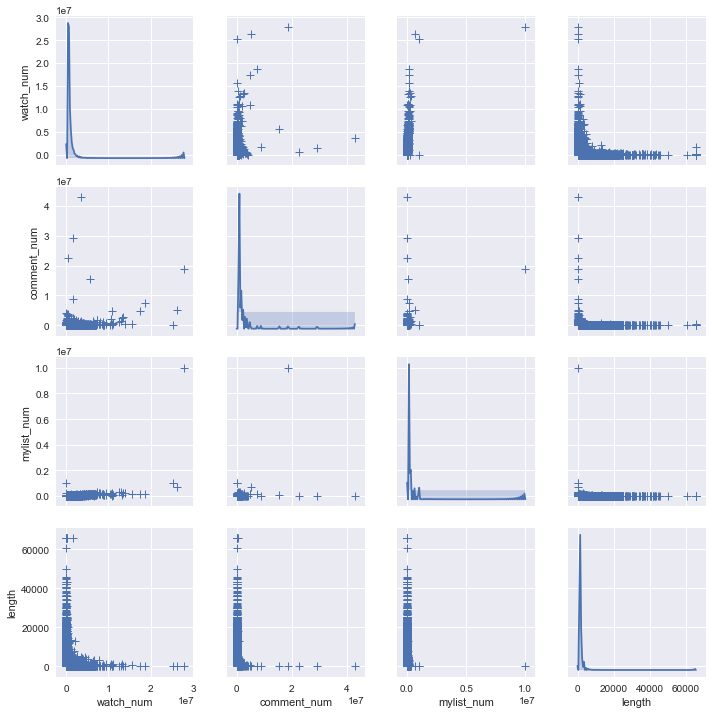

In [7]:
#Normalized
sns.pairplot(video_tsv_merge_concat,diag_kind="kde", markers="+",
            plot_kws=dict(s=50, edgecolor="b", linewidth=1),diag_kws=dict(shade=True))

#plt.savefig
plt.savefig('./Output/pairplot_video_histgram.png')

In [8]:
#1.MinMaxScaler（広がりを補正、非負値化）
scaler = MinMaxScaler()
scaler.fit(video_tsv_merge_concat)
video_tsv_merge_scaled = scaler.transform(video_tsv_merge_concat)

In [9]:
#2.L1正則化（制約補正）
video_tsv_merge_normalized = preprocessing.normalize(video_tsv_merge_scaled, norm='l1')

In [10]:
#normalized
video_dataframe_normalized = pd.DataFrame(video_tsv_merge_normalized,columns=video_tsv_merge_concat.columns)

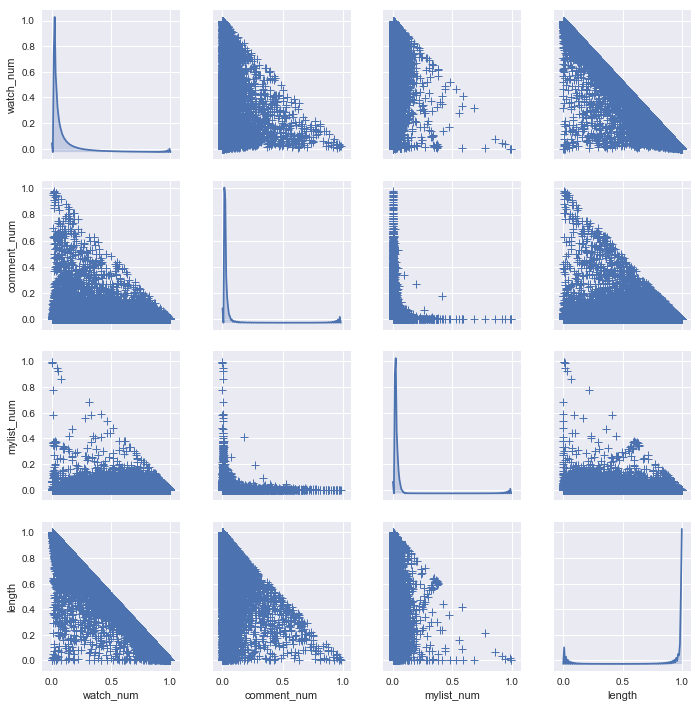

In [11]:
#pairplot
#Normalized
sns.pairplot(video_dataframe_normalized,diag_kind="kde", markers="+",
            plot_kws=dict(s=50, edgecolor="b", linewidth=1),diag_kws=dict(shade=True))

#plt.savefig
plt.savefig('./Output/pairplot_video_histgram_normalized.png')